In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.__version__

'2.7.0'

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
dim = x_train.shape[1:]

11501568/11490434 [==============================] - 0s 0us/step


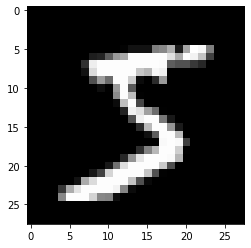

In [3]:
# seeing an image
plt.imshow(x_train[0],cmap = 'gray')

In [4]:
#  Convert each image from dim (28 x 28) to  (784 x 1) feature vector
def convert1D(x_data):
  x_data = np.squeeze(np.reshape(x_data,(dim[0]*dim[1],1)))
  return x_data
convert1D(x_train[0]).shape

(784,)

In [5]:
X = []
for im in x_train:
  X.append(convert1D(im))
X = np.array(X)
X.shape

(60000, 784)

In [8]:
#  Finding mean of feature vector along each column
X_bar = np.mean(X,axis = 0)
X_bar.shape

(784,)

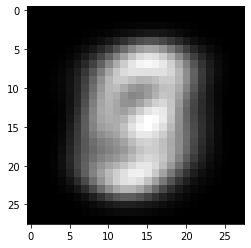

In [9]:
# Visualising mean of feature vectors
plt.imshow(np.reshape(X_bar,(28,28)),cmap = 'gray')

In [10]:
# Subtracting mean from each feature vector
X_norm = X - X_bar
X_norm.shape

(60000, 784)

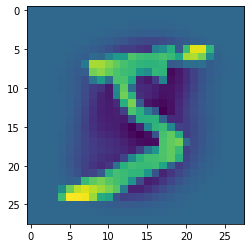

In [11]:
plt.imshow(np.reshape(X_norm[0],(28,28)))

In [12]:
# Calculating covariance matrix of X_norm
N = X_norm.shape[0]
S_x = 1/N * (X_norm.T @ X_norm)
S_x.shape

(784, 784)

In [13]:
# Compute eigen value and eigen vectors
eig_val ,eig_vec = np.linalg.eigh(S_x)
eig_val.shape,eig_vec.shape

((784,), (784, 784))

3428445.4330706233


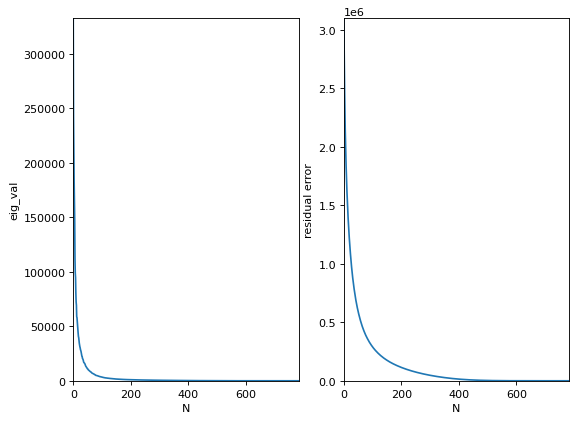

In [14]:
# Compute Residual error to find best value for d
data_range = np.arange(784)
sum_var = np.sum(eig_val)
print(sum_var)

plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1,2,1)
plt.xlim((0,eig_val.shape[0]))
plt.ylim((0,eig_val.max()))
plt.xlabel('N')
plt.ylabel('eig_val')
plt.plot(data_range,eig_val[::-1])


res_error = []
t = 0
n = int(eig_val.shape[0])
# print(eig_val[i])
for a in range(n-1,-1,-1):
  t += eig_val[a]
  res_error.append(sum_var - t)
plt.subplot(1,2,2)
plt.xlim((0,eig_val.shape[0]))
plt.ylim((0,max(res_error)))
plt.xlabel('N')
plt.ylabel('residual error')
plt.plot(data_range,res_error)



### from above graph , we see that best value for `d` is `200`.

In [48]:
def find_eigen(d,eig_val= eig_val,eig_vec = eig_vec):
  eig_vals = []
  eig_vecs = []
  for i in range(eig_val.shape[0]-1,eig_val.shape[0]-d-1,-1):
    eig_vals.append(eig_val[i])
    eig_vecs.append(eig_vec[:,i])
  # len(eig_vals),eig_vals[:10],len(eig_vecs),eig_vec[0] == eig_vec[783]
  eig_vals = np.array(eig_vals)
  eig_vecs = np.array(eig_vecs)
  return eig_vals,eig_vecs

In [49]:
# taking only 1st d eigen vectors which 
d = 200

eig_vals,eig_vecs = find_eigen(d)
eig_vals.shape,eig_vecs.shape

((200,), (200, 784))

In [50]:
# transformation matrix U
U = eig_vecs.T
U.shape

(784, 200)

In [51]:
# function to do dimensionality reduction
def dim_red(x_data,U = U):
  red_x = x_data @ U
  return red_x


In [52]:
X_norm[0].shape,U.shape,(X_norm[0] @ U).shape

((784,), (784, 200), (200,))

In [53]:
# doing dimensionality reduction
y_data = dim_red(X_norm)
y_data.shape

(60000, 200)

In [54]:
# Now we try to recover our original data with d = 200 components
# For this we just multiply by U^T as U.U^T = I by definition and since y_data = X.U
def reconstructed(y_data,U = U):
  recon_x = y_data @ U.T
  return recon_x


In [55]:
recon_x = reconstructed(y_data)
recon_x.shape

(60000, 784)

In [56]:
recon_x += X_bar

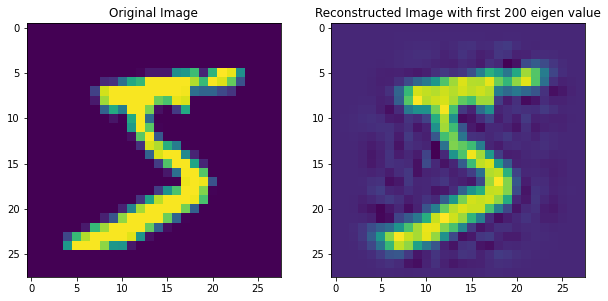

In [57]:
plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(np.reshape(X[0],(28,28)),cmap = 'viridis')

plt.subplot(1,2,2)
plt.title('Reconstructed Image with first 200 eigen value')
plt.imshow(np.reshape(recon_x[0],(28,28)),cmap = 'viridis')

In [77]:
def reconstruct(d):
  eig_vals1,eig_vecs1 = find_eigen(d)
  U1 = eig_vecs1.T
  x_data1 = X_norm @ U1
  y_data1 = x_data1 @ U1.T
  recon_x1 = y_data1 + X_bar
  return recon_x1

In [78]:
# Now seeing reconstructed image by taking 1st 100 and 1st 400 eigen vectors and full 784 eigrn values

"For d = 100"
recon_x1 = reconstruct(d = 100)
# plt.imshow(np.reshape(recon_x1[0],(28,28)),cmap = 'viridis')

"For d = 400"
recon_x2 = reconstruct(d = 400)
# plt.imshow(np.reshape(recon_x2[0],(28,28)),cmap = 'viridis')

"For d = 600"
recon_x3 = reconstruct(d = 600)
# plt.imshow(np.reshape(recon_x2[0],(28,28)),cmap = 'viridis')

"For d = 784"
recon_x4 = reconstruct(d = 784)
# plt.imshow(np.reshape(recon_x2[0],(28,28)),cmap = 'viridis')

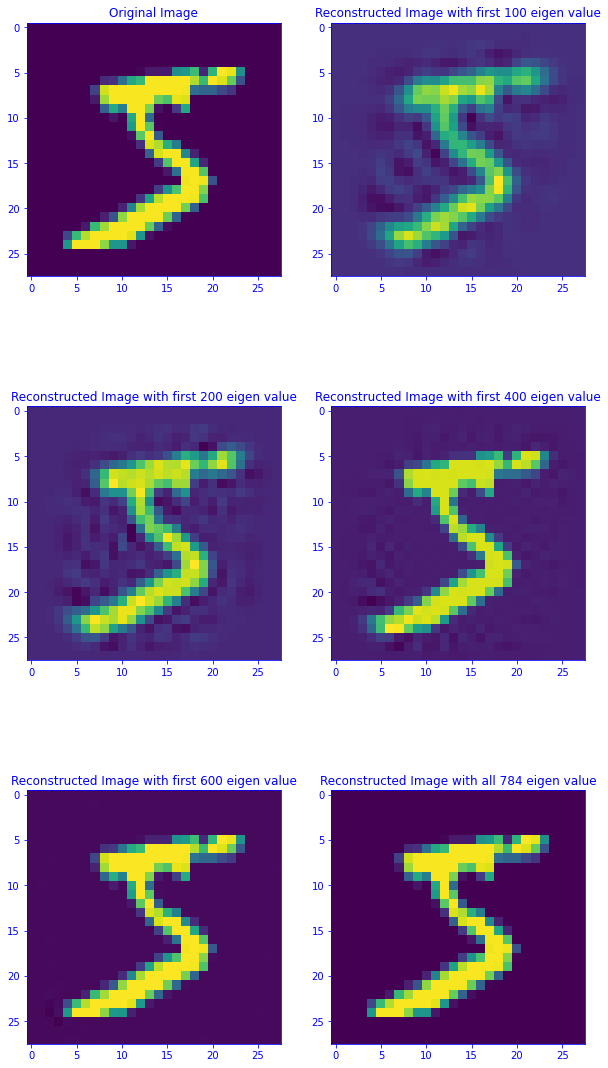

In [79]:
# params = {"ytick.color" : "b",
#           "xtick.color" : "b",
#           "axes.labelcolor" : "b",
#           "axes.edgecolor" : "b",
#           "text.color" : "b"}
# plt.rcParams.update(params)

# Final results

plt.figure(figsize = (10,20))
plt.subplot(3,2,1)
plt.title('Original Image')
plt.imshow(np.reshape(X[0],(28,28)),cmap = 'viridis')

plt.subplot(3,2,2)
plt.title('Reconstructed Image with first 100 eigen value')
plt.imshow(np.reshape(recon_x1[0],(28,28)),cmap = 'viridis')

plt.subplot(3,2,3)
plt.title('Reconstructed Image with first 200 eigen value')
plt.imshow(np.reshape(recon_x[0],(28,28)),cmap = 'viridis')

plt.subplot(3,2,4)
plt.title('Reconstructed Image with first 400 eigen value')
plt.imshow(np.reshape(recon_x2[0],(28,28)),cmap = 'viridis')

plt.subplot(3,2,5)
plt.title('Reconstructed Image with first 600 eigen value')
plt.imshow(np.reshape(recon_x3[0],(28,28)),cmap = 'viridis')

plt.subplot(3,2,6)
plt.title('Reconstructed Image with all 784 eigen value')
plt.imshow(np.reshape(recon_x4[0],(28,28)),cmap = 'viridis')